In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv("IMDB Dataset.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
df.head(3)

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive

In [8]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [9]:
import re



def preprocess_text(text):
    
    text = re.sub(r'<.*?>', '', text)
    
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    text = text.lower().strip()
    return text


df['cleaned_review'] = df['review'].apply(preprocess_text)


In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import classification_report, confusion_matrix
import nltk

In [11]:
sia = SentimentIntensityAnalyzer()

In [12]:
def get_sentiment_score(text):
    sentiment_dict = sia.polarity_scores(text)
    return sentiment_dict['compound']

df['compound_score'] = df['cleaned_review'].apply(get_sentiment_score)

In [13]:

def classify_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['predicted_sentiment'] = df['compound_score'].apply(classify_sentiment)


In [16]:
df.head(5)

review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                      cleaned_review  compound_score  \
0  one of the other reviewers has mentioned that ...         -0.9947   
1  a wonderful little production the filming tech...          0.9693   
2  i thought this was a wonderful way to spend ti...          0.9712   
3  basically theres a family where a little boy j...         -0.9117   
4  petter matteis love in the time of money is a ...          0.9744   

  predicted_sentiment  
0            negative  
1            positive  
2            positive  
3            negative  
4            positive

In [15]:
print(classification_report(df['sentiment'], df['predicted_sentiment'], target_names=['negative', 'neutral', 'positive']))


C:\Users\91770\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91770\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

    negative       0.79      0.53      0.63     25000
     neutral       0.00      0.00      0.00         0
    positive       0.65      0.85      0.74     25000

    accuracy                           0.69     50000
   macro avg       0.48      0.46      0.46     50000
weighted avg       0.72      0.69      0.69     50000



C:\Users\91770\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


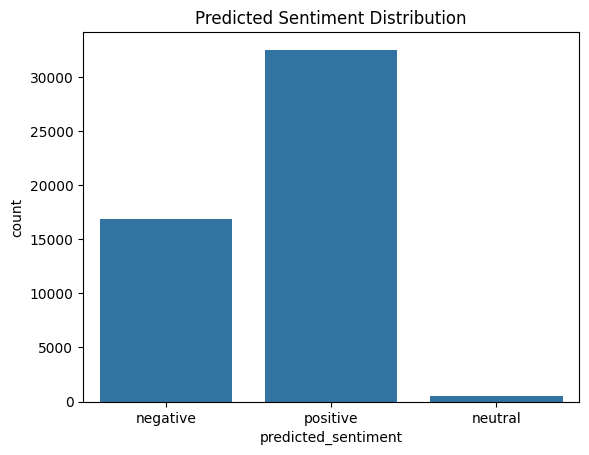

In [ ]:
sns.countplot(data=df, x='predicted_sentiment')
plt.title('Predicted Sentiment Distribution')
plt.show()


In [18]:
df.to_csv('IMDB_sentiment_analysis_results.csv', index=False)
